In [5]:
import pandas as pd
import faker
from sklearn.ensemble import IsolationForest
import plotly as po
import plotly.graph_objects as go
import seaborn as sns

In [6]:
dataset = pd.read_csv('dataset.csv')
dataset.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


<AxesSubplot: xlabel='type', ylabel='amount'>

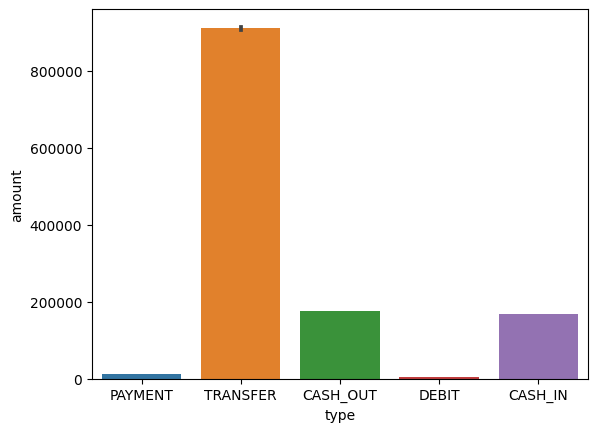

In [7]:
sns.barplot(dataset, x='type', y='amount')

In [8]:
import plotly.express as px

In [14]:
# sns.lineplot(dataset['oldbalanceDest'])
df = dataset.query("type=='DEBIT'")
fig = px.line(df['amount'])
fig.show()

In [32]:
import pandas as pd
from sklearn.model_selection import train_test_split

# Assuming your DataFrame is named 'df' and the last column is the target variable
# Replace 'your_target_column_name' with the actual name of your target column
target_column_name = df.columns[-1]

# Split the DataFrame into features (X) and target variable (y)
X = df.drop(columns=[target_column_name])
y = df[target_column_name]

X_encoded = pd.get_dummies(X)

# Use train_test_split to split the data into training and testing sets
# The test_size parameter determines the proportion of the dataset to include in the test split
# Set random_state for reproducibility
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)

# Display the shapes of the resulting sets
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)


X_train shape: (33145, 79973)
X_test shape: (8287, 79973)
y_train shape: (33145,)
y_test shape: (8287,)


In [33]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score


knn_classifier = KNeighborsClassifier(n_neighbors=3)


# Train the classifier on the training data
knn_classifier.fit(X_train, y_train)

# Make predictions on the testing data
y_pred = knn_classifier.predict(X_test)

# Calculate accuracy on the testing set
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 1.0
